In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
import pylab as plot

a = '改掉SOH定義的資料集_noerror.csv'
data = np.genfromtxt(a, dtype = None, delimiter = ',', skip_header = 0, filling_values = 0, invalid_raise = False, encoding = 'latin-1')
[Row,Column] = data.shape
print(data[0:3,:])

[[ 5.9916668e+01  2.2200000e+03 -2.3300000e-01  1.1700000e+03
   8.0069000e+00  1.5000000e+03  8.7500000e+00]
 [ 6.0583336e+01  2.2200000e+03 -2.1400000e-01  1.2300000e+03
   7.9929000e+00  1.7100000e+03  8.6700000e+00]
 [ 6.0000000e+01  2.2200000e+03 -2.3300000e-01  7.9600000e+02
   8.0034000e+00  1.5700000e+03  8.7300000e+00]]


In [2]:
features_train2, features_test2, soh_train2, soh_test2 = train_test_split(data[:,[1,2,3,4,5,6]], data[:,0], test_size=0.2, random_state=100)
print("features_train2\n", features_train2)
print("soh_train2\n", soh_train2)     #檢查格式是否正確,才不會讓ML程式垮掉

features_train2
 [[ 1.9490e+03 -2.6200e-01  7.2800e+02  8.1100e+00  1.3100e+03  8.7600e+00]
 [ 1.2940e+03 -3.2600e-01  1.7900e+02  8.7734e+00  7.0100e+02  8.8900e+00]
 [ 1.6690e+03 -3.2000e-01  6.8200e+02  8.2499e+00  1.0800e+03  8.8800e+00]
 ...
 [ 2.2100e+03 -2.1000e-01  8.1200e+02  8.0780e+00  1.5000e+03  8.6600e+00]
 [ 1.4570e+03 -2.9900e-01  2.4700e+02  8.4793e+00  9.0200e+02  8.8400e+00]
 [ 1.7770e+03 -2.4900e-01  6.9500e+02  8.1788e+00  1.0500e+03  8.7500e+00]]
soh_train2
 [49.77778  24.777777 42.416668 ... 56.02778  32.38889  44.36111 ]


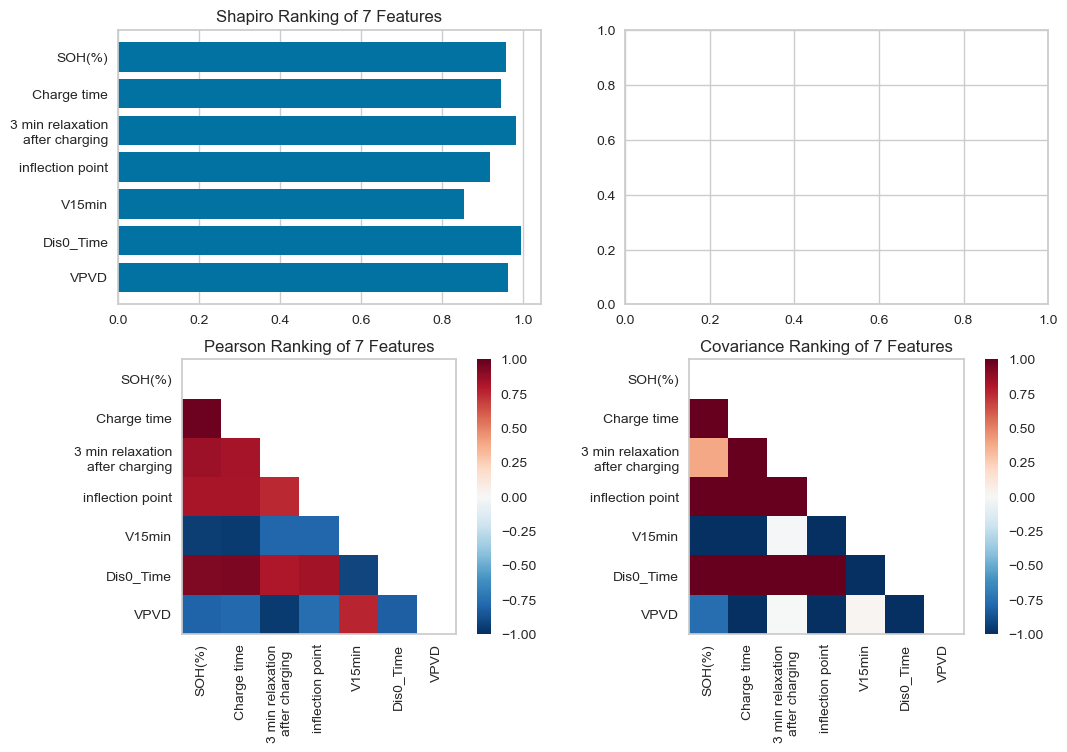

In [12]:
'''特徵之間的關係'''
from yellowbrick.features import rank1d, rank2d

_, axes = plot.subplots(nrows=2, ncols=2, figsize=(12,8), dpi=100)

rank1d(data, algorithm='shapiro',features=["SOH(%)","Charge time","3 min relaxation\nafter charging","inflection point","V15min","Dis0_Time","VPVD"], ax=axes[0,0], show=False)
rank2d(data, algorithm="pearson",features=["SOH(%)","Charge time","3 min relaxation\nafter charging","inflection point","V15min","Dis0_Time","VPVD"], ax=axes[1,0], show=False)
rank2d(data, algorithm="covariance",features=["SOH(%)","Charge time","3 min relaxation\nafter charging","inflection point","V15min","Dis0_Time","VPVD"], ax=axes[1,1], show=False)
plot.show()

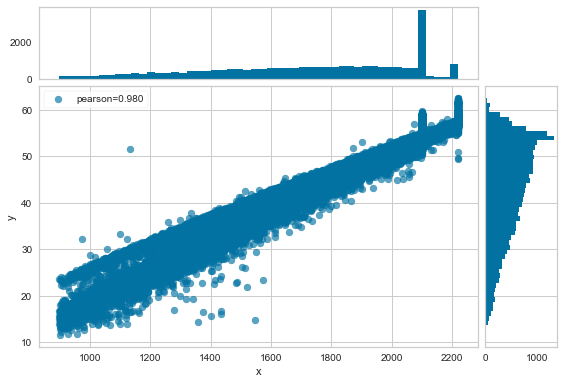

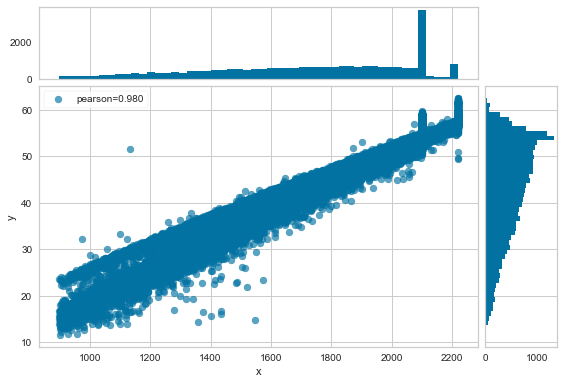

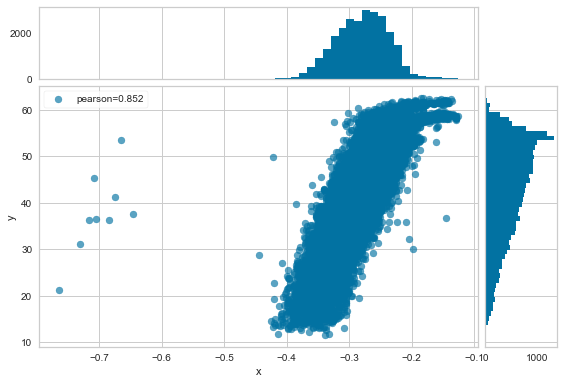

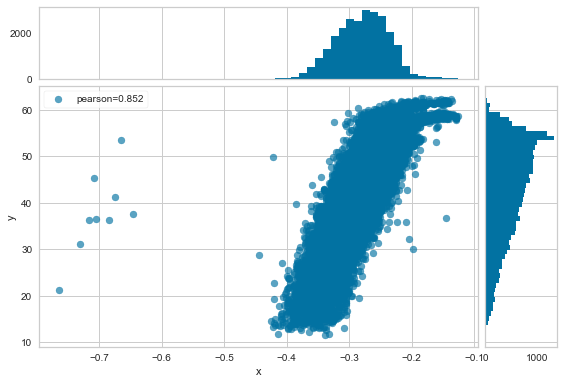

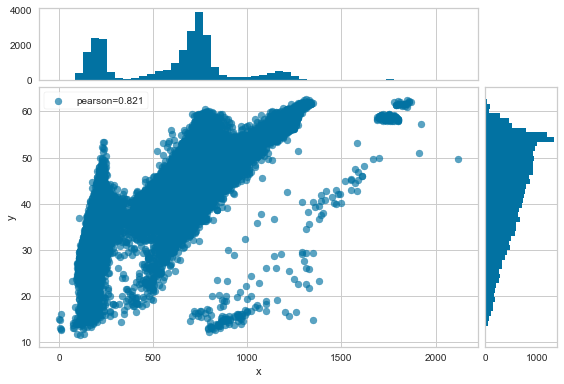

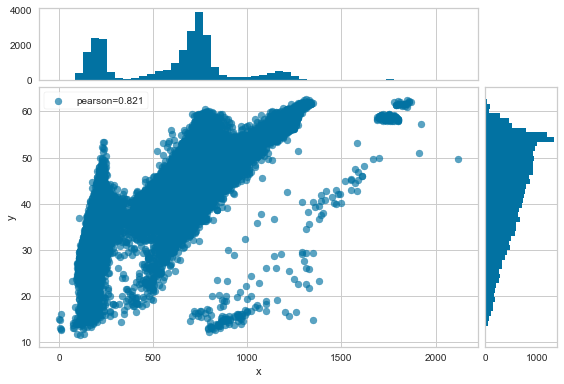

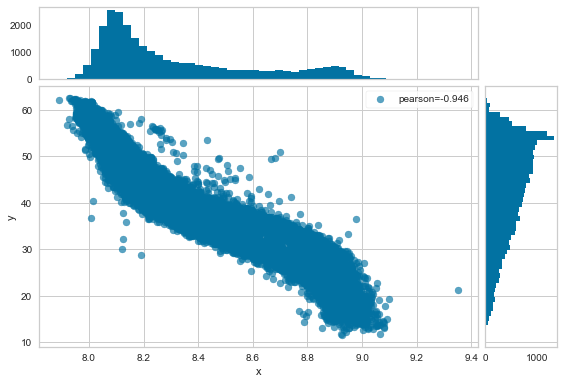

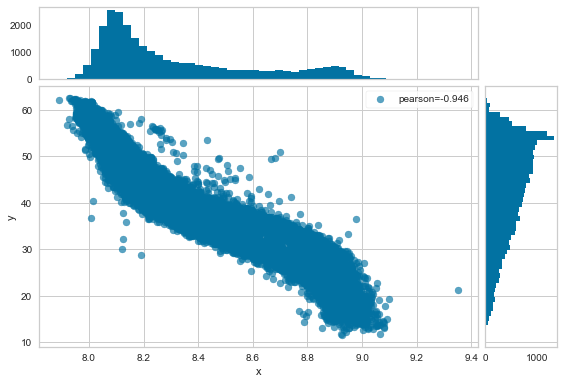

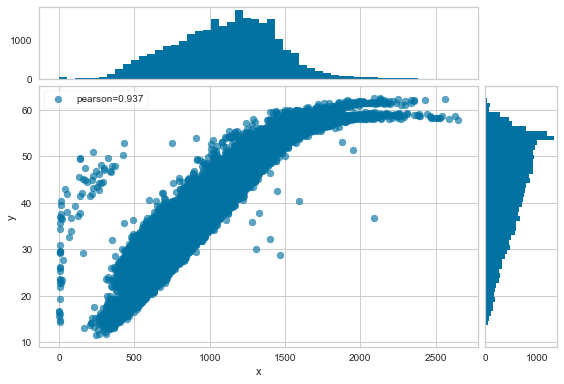

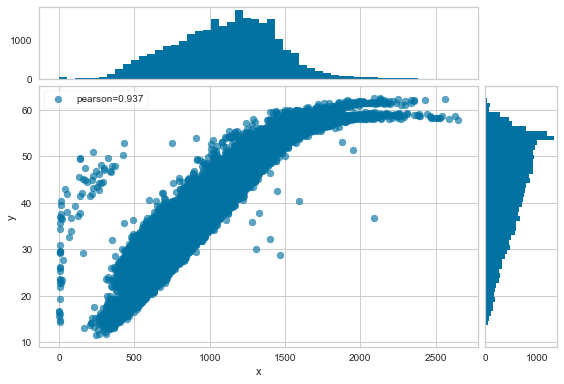

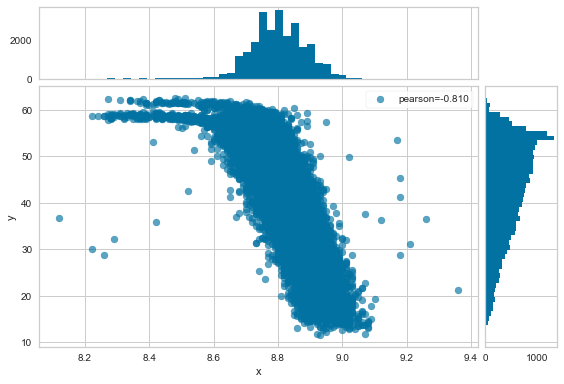

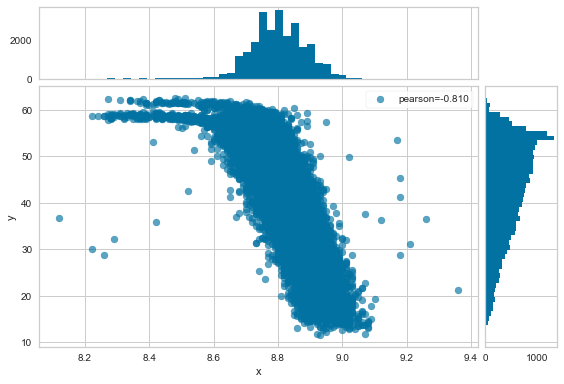

In [61]:
'''双变量关系图'''
#from yellowbrick.datasets import load_concrete
from yellowbrick.features import joint_plot

for ii in range(1,7,1):
    visualizer = joint_plot(data[:,ii], data[:,0], dpi=300)   #rows='SOH(%)', columns='xx',
    visualizer.show()                                         #, rows=feat[ii], columns=feat[0],

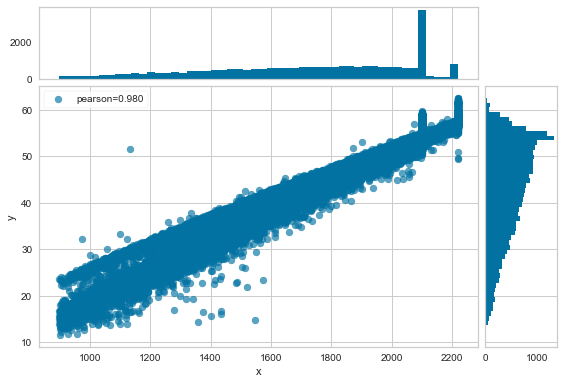

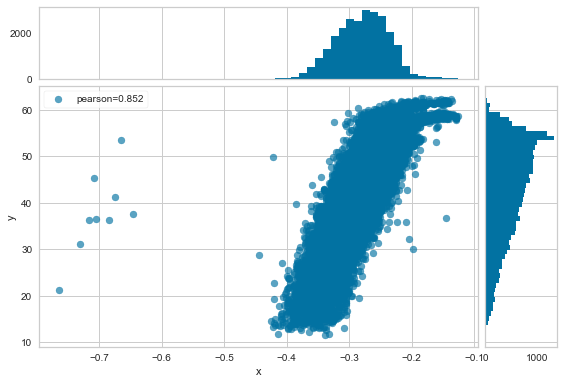

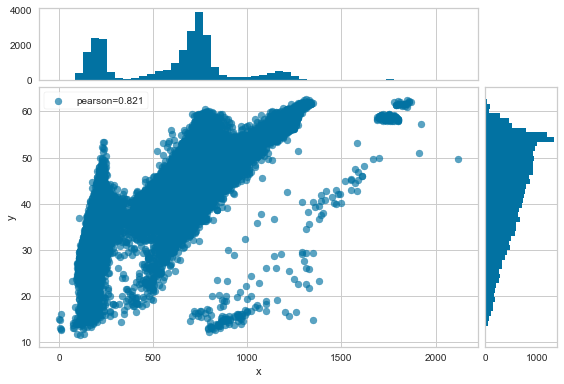

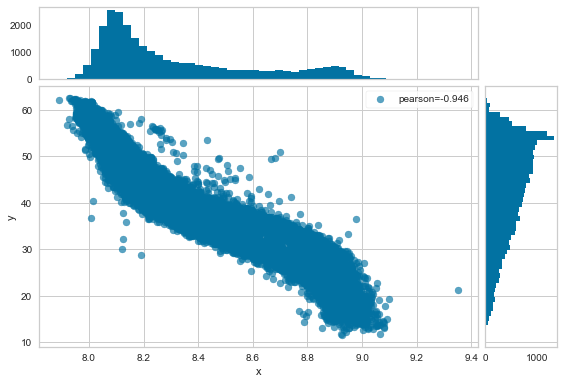

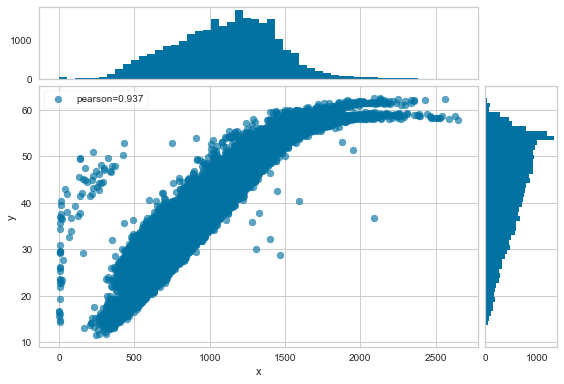

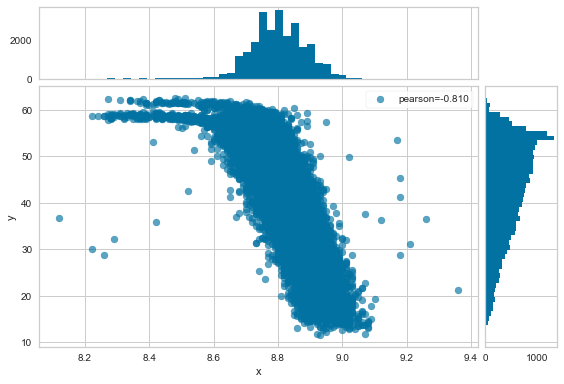

In [51]:
'''双变量关系图(JointPlotVisualizer)'''
#from yellowbrick.datasets import load_concrete
from yellowbrick.features import JointPlotVisualizer

for ii in range(1,7,1):
    visualizer = JointPlotVisualizer(dpi=300)   #rows='SOH(%)', columns='xx',
    result = visualizer.fit_transform(data[:,ii], data[:,0])   #,2,3,4,5,6
    visualizer.show()

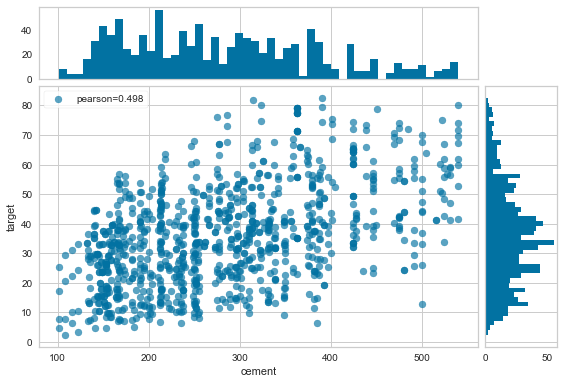

<AxesSubplot:xlabel='cement', ylabel='target'>

In [18]:
'''双变量关系图'''
from yellowbrick.datasets import load_concrete
from yellowbrick.features import JointPlotVisualizer

x,y = load_concrete()

visualizer = JointPlotVisualizer(columns='cement', dpi=100)

result = visualizer.fit_transform(x,y)
visualizer.show()

In [ ]:
'''Reference regarding to the above codes'''
https://blog.csdn.net/LuohenYJ/article/details/107574746